<a href="https://colab.research.google.com/github/AbbasHussain72/Wavelet-featre-extraction-/blob/main/current_wavelet_Transform_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.widgets import SpanSelector
import glob
import os
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
#read csv to append the data and reset index
path = '/content/drive/MyDrive/goodbaddata.csv'
masterdata = pd.read_csv(path,sep='\t')
masterdata = masterdata.drop(['Unnamed: 0'], axis = 1)

In [37]:
#To take interested data
df = masterdata[(masterdata['Tool'] == 'OP01') | (masterdata['Tool'] == 'OP02')| (masterdata['Tool'] == 'OP04')| (masterdata['Tool'] == 'OP07')| (masterdata['Tool'] == 'OP10')]

In [35]:
df.shape

(16605837, 9)

In [38]:
#Function for balancing the data according to condition
def balance(df,con1,con2,con3):
  v = []
  v = df[(df['Tool'] == con1) & (df['Condition'] == con2)& (df['Machine'] == con3)].index
  f = df[(df['Tool'] == 'OP02') & (df['Condition'] == 'bad') & (df['Machine'] == 'M01')].index


  # h = df[(df['Tool'] == 'con1') & (df['Condition'] == 'con2')].shape
  bb = abs(len(v)- len(f))
  v = v[0:bb]
  new = df.loc[df.index.drop(v)]

  return new

In [39]:
df = balance(df,'OP02','good','M01')
df = balance(df,'OP02','good','M02')
df = balance(df,'OP02','good','M03')
df = balance(df,'OP02','bad','M02')
df = balance(df,'OP02','bad','M03')
df = balance(df,'OP01','good','M01')
df = balance(df,'OP01','good','M02')
df = balance(df,'OP01','good','M03')
df = balance(df,'OP01','bad','M01')
df = balance(df,'OP01','bad','M02')
df = balance(df,'OP01','bad','M03')
df = balance(df,'OP04','good','M01')
df = balance(df,'OP04','good','M02')
df = balance(df,'OP04','good','M03')
df = balance(df,'OP04','bad','M01')
df = balance(df,'OP04','bad','M02')
df = balance(df,'OP04','bad','M03')
df = balance(df,'OP07','good','M01')
df = balance(df,'OP07','good','M02')
df = balance(df,'OP07','good','M03')
df = balance(df,'OP07','bad','M01')
df = balance(df,'OP07','bad','M02')
df = balance(df,'OP07','bad','M03')
df = balance(df,'OP10','good','M01')
df = balance(df,'OP10','good','M02')
df = balance(df,'OP10','good','M03')
df = balance(df,'OP10','bad','M01')
df = balance(df,'OP10','bad','M02')
df = balance(df,'OP10','bad','M03')

# df = balance(df,'OP04','bad')
# df = balance(df,'OP06','good')
# df = balance(df,'OP06','bad')
# df = balance(df,'OP07','good')
# df = balance(df,'OP07','bad')
# df = balance(df,'OP08','good')
# df = balance(df,'OP08','bad')
# df = balance(df,'OP10','good')
# df = balance(df,'OP10','bad')
# df = balance(df,'OP11','good')
# df = balance(df,'OP11','bad')
# df = balance(df,'OP12','good')
# df = balance(df,'OP12','bad')
# df = balance(df,'OP14','good')
#df = balance(df,'OP01','bad')



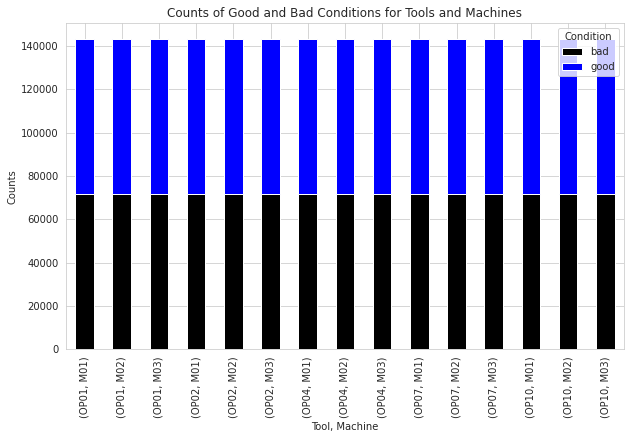

In [40]:
# Grouped the data for bar plot
grouped = df.groupby(['Tool', 'Machine', 'Condition']).size().reset_index(name='counts')

# Pivot the data to create a stacked bar plot
pivot = grouped.pivot_table(index=['Tool', 'Machine'], columns='Condition', values='counts', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
colors = {'good': 'blue', 'bad': 'black'}
ax = pivot.plot.bar(stacked=True, color=[colors[c] for c in pivot.columns], figsize=(10, 6))

# Set the labels for the axes and the title
ax.set_xlabel('Tool, Machine')
ax.set_ylabel('Counts')
ax.set_title('Counts of Good and Bad Conditions for Tools and Machines')

# Show the plot
plt.show()


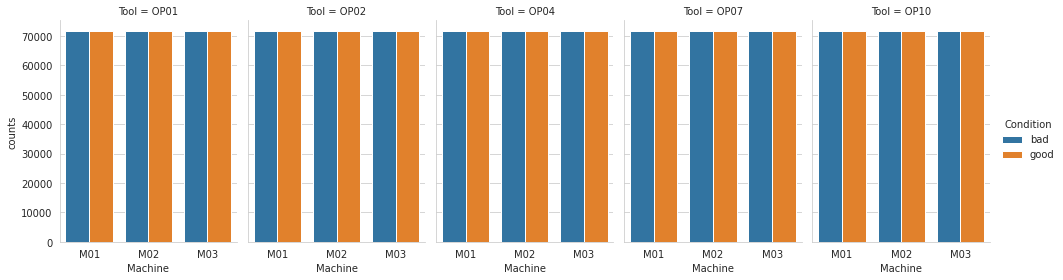

In [41]:
import seaborn as sns
# Create a grouped bar chart
sns.catplot(x="Machine", y="counts", hue="Condition", col="Tool", data=grouped, kind="bar", height=4, aspect=.7)


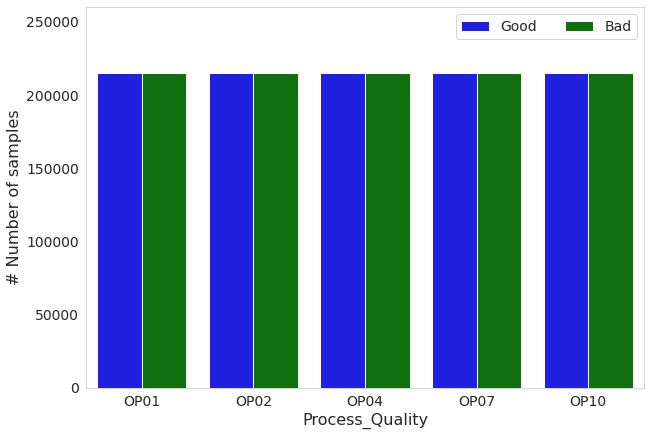

<Figure size 432x288 with 0 Axes>

In [60]:
#plotting the data
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
sns.set_style('whitegrid')
plt.figure(figsize = (10, 7))
sns.countplot(x = 'Tool',hue = 'Condition',data = df,palette=['blue', 'green'])
#plt.title('Number of samples', fontsize=16)
plt.xlabel('Process_Quality', fontsize=16)
plt.ylabel('# Number of samples', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)

# Set the limits of the x and y axes
#plt.xlim(left=-0.5, right=2.5)
plt.ylim(bottom=0, top=260000)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Modify the labels
labels[0] = 'Good'
labels[1] = 'Bad'

# Create a new legend with the modified labels
plt.legend(handles, labels, fontsize = 14,ncol=2)

plt.show()
plt.clf()

In [61]:
plt.savefig('plot.tiff', dpi=300)

<Figure size 432x288 with 0 Axes>

In [43]:
df.to_csv('goodbaddatanewbalanced.csv', sep='\t') # relative position

# Feature Extraction using Wavelet Packet Analysis

In [ ]:
df['Repeat'] = df['Repeat'].astype(str)
df['newcol'] = df['Machine'] +  df['Date'] + df['Tool'] + df['Condition'] + df['Repeat']
df = df.reset_index(drop = True)

In [ ]:
df.head()

,Machine,Date,Tool,Condition,Repeat,Time (s),X,Y,Z,newcol
0,M01,Aug2019,OP01,bad,0,4.9075,-80.0,279.0,-1091.0,M01Aug2019OP01bad0
1,M01,Aug2019,OP01,bad,0,4.9080,44.0,216.0,-1286.0,M01Aug2019OP01bad0
2,M01,Aug2019,OP01,bad,0,4.9085,-122.0,144.0,-1245.0,M01Aug2019OP01bad0
3,M01,Aug2019,OP01,bad,0,4.9090,64.0,-89.0,-1177.0,M01Aug2019OP01bad0
4,M01,Aug2019,OP01,bad,0,4.9095,-40.0,-261.0,-981.0,M01Aug2019OP01bad0


##  Number of segment for each file

In [ ]:
sum1=[]
window_size = 2000
step_size = 1000
for i in df['newcol'].unique():
    print (i)
    master_data =df[(df['newcol'] == i)]
    v = 0
    for j in range(0, master_data.shape[0] - window_size, step_size):
        v = v+1
    print(v)
        #num_segments = np.floor(len(master_data )/1000)
    sum1.append(v)
    #print(num_segments)
print(np.sum(sum1))

M01Aug2019OP01bad0
28
M01Feb2019OP01bad0
46
M01Feb2019OP02bad0
70
M01Aug2021OP07bad1
38
182


In [ ]:
# def compute_shannon_entropy(signal):
#     return -np.nansum(signal**2 * np.log(signal**2)) # nansum to exclude pesky terms like "0*np.log(0)"

In [ ]:
# Function to find the entropy of the signal

from scipy.stats import entropy
from math import log, e
import pandas as pd


def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

## Mother wavelet selection based on Minimum Entropy criteria

In [ ]:
# import collections
 
# from scipy.stats import entropy
  
# def estimate_shannon_entropy(dna_sequence):
#     bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
#     # define distribution
#     dist = [x/sum(bases.values()) for x in bases.values()]
 
#     # use scipy to calculate entropy
#     entropy_value = entropy(dist, base=2)
 
#     return entropy_value



In [ ]:
#len(df['newcol'].unique())

257

In [ ]:
# wavelet_feature_m = pd.DataFrame() 

In [ ]:
# #This is made for the selection of mother wavelet based on minimum entropy criteria
# import pywt
# data = df
# m = 'haar'    #['db1','db2','bior4.4']   'coif1','coif3','sym4','sym2']
# w = pywt.Wavelet (m)
# level = 2
# wavelet_feature_i = pd.DataFrame()
# import time
# start = time.time()
# for i in data['newcol'].unique():
#     print(i)
#     master_data =data[(data['newcol'] == i)]      
#     wavelet_feature = pd.DataFrame()
#     wavelet_feature['Date'] = [max(master_data['Date'].values)]
#     wavelet_feature['Machine'] = [max(master_data['Machine'])]
#     wavelet_feature['Operation'] = [max(master_data['Tool'])]
#     wavelet_feature['Condition'] = [max(master_data['Condition'])]
#     wavelet_feature['Repeat'] = [max(master_data['Repeat'])]
#     wavelet_feature['operationcondition'] =  wavelet_feature['Operation']  + wavelet_feature['Condition']
#     wavelet_feature['wavelet'] = [m]
#     df1 = pd.DataFrame()
#     df1['X'] = master_data['X']
#     df1['Y'] = master_data['Y']
#     df1['Z'] = master_data['Z']
#     colvalue = ['X','Y','Z']
#     for val in colvalue:
#         data_wave = df1[val].values
#         wp = pywt.WaveletPacket(data_wave,w, maxlevel = level) # Wavelet packet transformation
#         packet_names = [node.path for node in wp.get_level(level, "natural")]
#         for v in range(len(packet_names)):
#             new_wp = pywt.WaveletPacket(data = None , wavelet = w , maxlevel = level)
#             new_wp[packet_names[v]] = wp[packet_names[v]].data
#             reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients       
#             # Wavelet feature
#             wavelet_feature['entropy'+ val + str(v)]  = [entropy2(reconstructed_signal)]# Entropy of reconstructed signal
#             wavelet_feature['Energy'+ val + str(v)]  = [np.sum(reconstructed_signal**2)/len(reconstructed_signal)]
#             wavelet_feature['Ratio'+ val + str(v)]  = wavelet_feature['Energy'+ val + str(v)] / wavelet_feature['entropy'+ val + str(v)]

#     wavelet_feature_i = wavelet_feature_i.append(wavelet_feature)
#     wavelet_feature_i = wavelet_feature_i.reset_index(drop = True)



# end = time.time()
# print(end - start)

M02Aug2019OP01bad0
M02Feb2019OP01bad0
M02Feb2019OP01bad1
M02Feb2019OP02bad0
M02Feb2019OP02bad1
M02Aug2019OP04bad0
M02Feb2019OP04bad0
M02Feb2019OP04bad2
M02Aug2019OP07bad0
M02Feb2019OP07bad0
M02Feb2019OP07bad1
M02Feb2019OP10bad0
M02Feb2019OP10bad1
M03Aug2019OP01bad0
M03Feb2021OP01bad0
M03Feb2021OP02bad0
M03Aug2019OP04bad0
M03Feb2021OP04bad0
M03Aug2019OP07bad0
M03Aug2021OP07bad0
M03Feb2021OP07bad0
M03Aug2021OP10bad0
M02Aug2019OP01good0
M02Aug2019OP01good1
M02Aug2019OP01good2
M02Aug2020OP01good0
M02Aug2020OP01good1
M02Aug2020OP01good2
M02Aug2021OP01good0
M02Aug2021OP01good1
M02Aug2021OP01good2
M02Feb2019OP01good0
M02Feb2019OP01good1
M02Feb2019OP01good2
M02Feb2020OP01good0
M02Feb2020OP01good1
M02Feb2020OP01good2
M02Feb2021OP01good0
M02Feb2021OP01good1
M02Feb2021OP01good2
M02Aug2019OP02good0
M02Aug2019OP02good1
M02Aug2019OP02good2
M02Aug2020OP02good0
M02Aug2020OP02good1
M02Aug2020OP02good2
M02Aug2021OP02good0
M02Aug2021OP02good1
M02Aug2021OP02good2
M02Feb2019OP02good0
M02Feb2019OP02good1
M0

In [ ]:
# wavelet_feature_m = wavelet_feature_m.append(wavelet_feature_i)
# wavelet_feature_m = wavelet_feature_m.reset_index(drop = True)

In [ ]:
# wavelet_feature_m.shape

(1253, 43)

In [ ]:
# #FIND THE MEAN OF ENTROPY
# a = wavelet_feature_m['operationcondition'].unique()
# B = wavelet_feature_m['wavelet'].unique()
# new = pd.DataFrame()
# for i in B:
#     new1 = pd.DataFrame()
#     for n in a:
#         dff = wavelet_feature_m[(wavelet_feature_m['operationcondition'] == n) & (wavelet_feature_m['wavelet'] == i)]
#         d = dff.columns[7:]
#         Avg = dff.mean()
#         new1[d] = [Avg[1:]]
#         new1['operationcondition'] = [max(dff['operationcondition'])]
#         new1['wavelet'] = [max(dff['wavelet'])]
#         new = new.append(new1)
#         new = new.reset_index(drop = True)

C:\Users\AHUSSAIN14\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# new.to_csv('selectionofwavelet.csv', sep='\t') # relative position

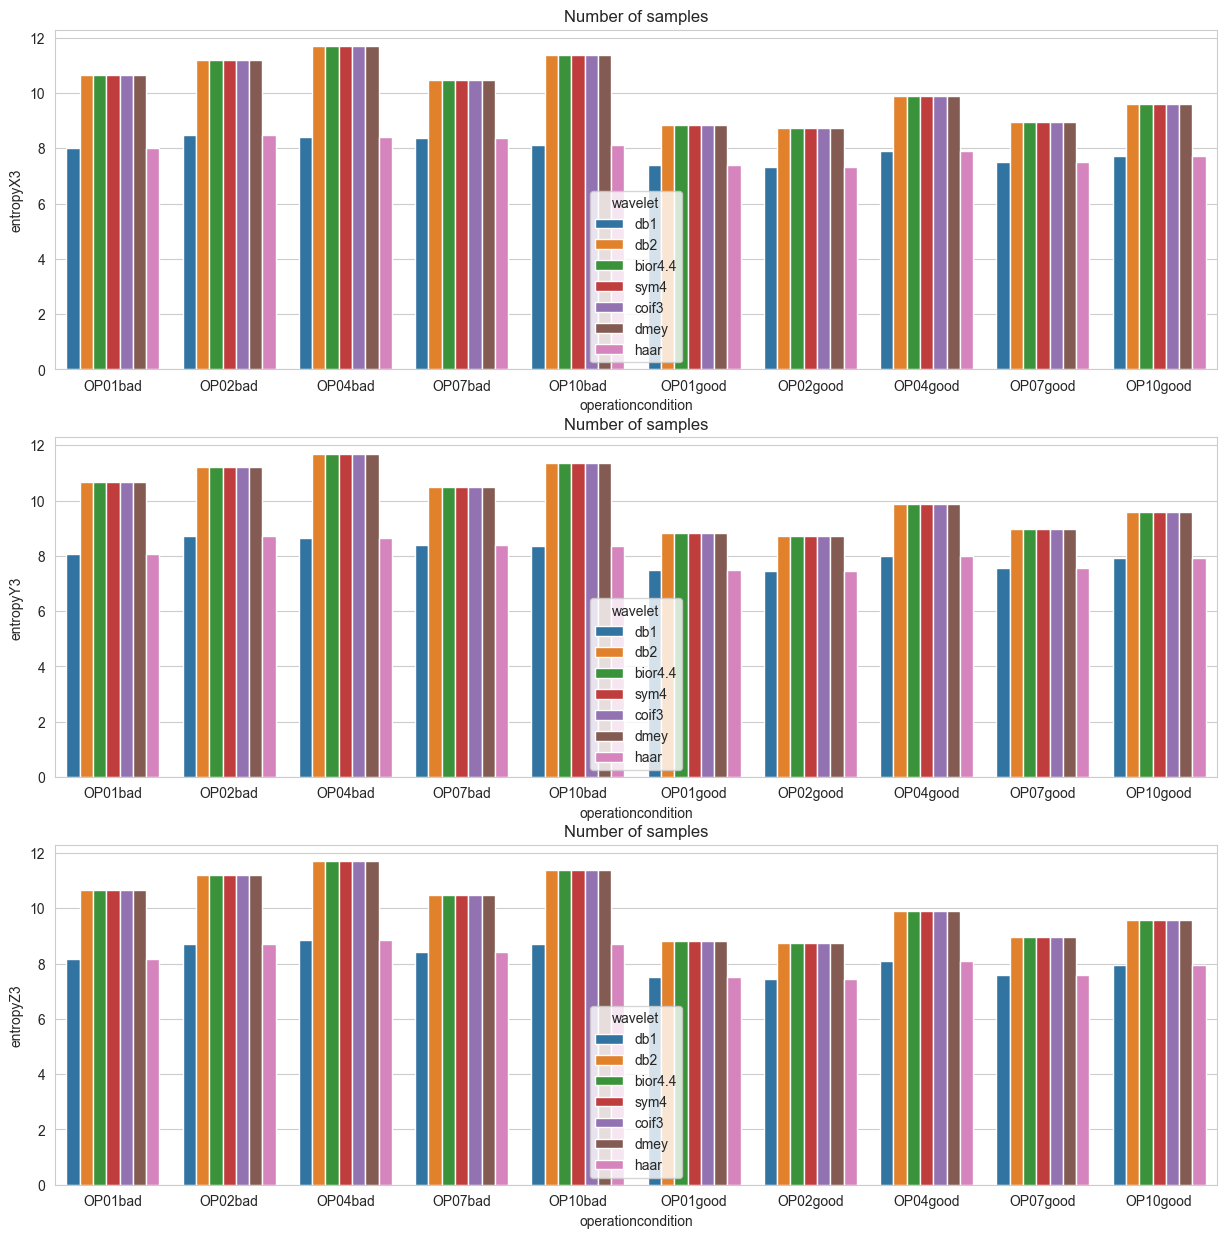

<Figure size 640x480 with 0 Axes>

In [ ]:
# import seaborn as sns
# from scipy import stats
# from scipy.signal import find_peaks
# sns.set_style('whitegrid')
# plt.figure(figsize = (15, 15))
# plt.subplot(3,1,1)
# sns.barplot(data = new, x = 'operationcondition',y = 'entropyX3', hue = 'wavelet')
# plt.title('Number of samples')
# plt.subplot(3,1,2)
# sns.barplot(data = new, x = 'operationcondition',y = 'entropyY3' , hue = 'wavelet')
# plt.title('Number of samples')
# plt.subplot(3,1,3)
# sns.barplot(data = new, x = 'operationcondition',y = 'entropyZ3' , hue = 'wavelet')
# plt.title('Number of samples')
# plt.show()
# plt.clf()

In [ ]:
# q = 'RatioX3'
# # plotdf = new[(new['wavelet'] == 'db1')]
# # print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'db2')]
# print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'bior4.4')]
# print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'sym4')]
# print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'coif3')]
# print(plotdf[q].mean())
# plotdf = new[(new['wavelet'] == 'dmey')]
# print(plotdf[q].mean())

592.5642982050135
576.0733602190219
567.3237733083236
563.6747276551814
582.9191034060606


## Wavelet Feature Extraction

In [ ]:
#This will create the data list according to 'newcol'
import pywt
w = pywt.Wavelet ('dmey')
level = 2
wavelet_feature_all = pd.DataFrame() 
#wavelet_feature_test = pd.DataFrame()
data = df
window_size = 2000
step_size = 1000

In [ ]:
data.shape

(2918330, 10)

In [ ]:
b = ['M01Aug2019OP01bad0',
'M01Feb2019OP01bad0',
'M01Feb2019OP02bad0',
'M01Aug2021OP07bad1']
for i in b:
    print(i)

M01Aug2019OP01bad0
M01Feb2019OP01bad0
M01Feb2019OP02bad0
M01Aug2021OP07bad1


In [ ]:

# for i in data['newcol'].unique():
for i in b:
    print(i)
    master_data =data[(data['newcol'] == i)]
    vff = master_data.shape
    print(vff[0])
    wavelet_feature_j = pd.DataFrame()
    
    for j in range(0, master_data.shape[0] - window_size, step_size):
        wavelet_feature = pd.DataFrame()
        df1 = pd.DataFrame()
        df1['X'] = master_data['X'].values[j: j + window_size]
        df1['Y'] = master_data['Y'].values[j: j + window_size]
        df1['Z'] = master_data['Z'].values[j: j + window_size]

        colvalue = ['X','Y','Z']
        wavelet_feature['Date'] = [max(master_data['Date'].values[j: j + window_size])]
        wavelet_feature['Machine'] = [max(master_data['Machine'].values[j: j + window_size])]
        wavelet_feature['Operation'] = [max(master_data['Tool'].values[j: j + window_size])]
        wavelet_feature['Condition'] = [max(master_data['Condition'].values[j: j + window_size])]
        wavelet_feature['Repeat'] = [max(master_data['Repeat'].values[j: j + window_size])]
        wavelet_feature['operationcondition'] =  wavelet_feature['Operation']  + wavelet_feature['Condition']
        
        for val in colvalue:
            data_wave = df1[val].values
            wp = pywt.WaveletPacket(data_wave,w, maxlevel = level) # Wavelet packet transformation
            packet_names = [node.path for node in wp.get_level(level, "natural")]
            for v in range(len(packet_names)):
                new_wp = pywt.WaveletPacket(data = None , wavelet = w , maxlevel = level)
                new_wp[packet_names[v]] = wp[packet_names[v]].data
                reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients       
            
                # Wavelet feature
                wavelet_feature['entropy'+ val + str(v)]  = [entropy2(reconstructed_signal,2)]# Entropy of reconstructed signal
                wavelet_feature['max'+ val + str(v)]  = [max(reconstructed_signal)] # max of signal
                wavelet_feature['min'+ val + str(v)]  = [min(reconstructed_signal)]
                wavelet_feature['mean'+ val + str(v)]  = [np.mean(reconstructed_signal)]
                wavelet_feature['std'+ val + str(v)]  = [np.std (reconstructed_signal)]
                wavelet_feature['skew'+ val + str(v)]  = [stats.skew(reconstructed_signal)]
                #wavelet_feature['kurtosis'+ val + str(v)]  = [stats.kurtosis(reconstructed_signal)]
                #wavelet_feature['Energy'+ val + str(v)]  = [(np.sum(reconstructed_signal**2))/len(reconstructed_signal)]
                
                
        wavelet_feature_j = wavelet_feature_j.append(wavelet_feature)
        # pd.concat([wavelet_feature_j,wavelet_feature])
        wavelet_feature_j = wavelet_feature_j.reset_index(drop = True)
        
    wavelet_feature_all = wavelet_feature_all.append(wavelet_feature_j)
    # pd.concat([wavelet_feature_all,wavelet_feature_j])
    wavelet_feature_all = wavelet_feature_all.reset_index(drop = True)
    
        
        

    

In [ ]:
wavelet_feature_all.shape

(182, 78)

In [ ]:
# #This will create the data list according to toolcondition
# import pywt
# w = pywt.Wavelet ('dmey')
# level = 2
# x_i = []
# y_i = []
# z_i = []
# labels_i = []
# data = df
# window_size = 2000
# step_size = 1000
# # Statistical Features on raw x, y and z in time domain
# for i in data['newcol'].unique():
# #for v in range(0,2):
#     #i = a[v]
#     x_j = []
#     y_j = []
#     z_j = []
#     labels_j = []
#     dates_j = []
#     machines_j = []
  
#     master_data =data[(data['newcol'] == i)]
#     print(i)
#     #print(master_data.shape[0])

#     for j in range(0, master_data.shape[0] - window_size, step_size):
#         xs = master_data['X'].values[j: j + window_size]
#         ys = master_data['Y'].values[j: j + window_size]
#         zs = master_data['Z'].values[j: j + window_size]
#         dates = master_data['Date'].values[j: j + window_size]
#         machines = master_data['Machine'].values[j: j + window_size]
#         operation = master_data['Tool'].values[j: j + window_size]
#         condition = master_data['Condition'].values[j: j + window_size]
#         label = operation + condition
#         colvalue = [xs,ys,zs]
#         for val in colvalue:
#             #print(val)
#             data_wave = val
#             wp = pywt.WaveletPacket(data_wave,w, maxlevel = level) # Wavelet packet transformation
#             packet_names = [node.path for node in wp.get_level(level, "natural")]
#             for v in range(len(packet_names)):
#                 new_wp = pywt.WaveletPacket(data = None , wavelet = w , maxlevel = level)
#                 new_wp[packet_names[v]] = wp[packet_names[v]].data
#                 reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients        
#                 if (val == xs).all():
#                     x_j.append(reconstructed_signal)
#                     labelv = [max(label)]* len(reconstructed_signal)
#                     labels_j.append(labelv)
#                 elif (val == ys).all():
#                     y_j.append(reconstructed_signal)
#                 else:
#                     z_j.append(reconstructed_signal)
        
#     x_i.append(x_j)
#     y_i.append(y_j)
#     z_i.append(z_j)
#     labels_i.append(labels_j)
    

M01Aug2019OP01bad0
M01Feb2019OP01bad0
M01Feb2019OP02bad0
M01Aug2019OP04bad0
M01Feb2019OP04bad0
M01Aug2019OP07bad0
M01Aug2021OP07bad0
M01Aug2021OP07bad1
M01Feb2019OP07bad0
M01Aug2021OP10bad0
M01Feb2019OP10bad0
M01Feb2019OP10bad1
M01Feb2019OP10bad2
M02Aug2019OP01bad0
M02Feb2019OP01bad0
M02Feb2019OP01bad1
M02Feb2019OP02bad0
M02Feb2019OP02bad1
M02Aug2019OP04bad0
M02Feb2019OP04bad0
M02Feb2019OP04bad2
M02Aug2019OP07bad0
M02Feb2019OP07bad0
M02Feb2019OP07bad1
M02Feb2019OP10bad0
M02Feb2019OP10bad1
M03Aug2019OP01bad0
M03Feb2021OP01bad0
M03Feb2021OP02bad0
M03Aug2019OP04bad0
M03Feb2021OP04bad0
M03Aug2019OP07bad0
M03Aug2021OP07bad0
M03Feb2021OP07bad0
M03Aug2021OP10bad0
M01Aug2019OP01good0
M01Aug2019OP01good1
M01Aug2019OP01good2
M01Feb2019OP01good0
M01Feb2019OP01good1
M01Feb2019OP01good2
M01Feb2020OP01good0
M01Feb2020OP01good1
M01Feb2020OP01good2
M01Feb2021OP01good0
M01Feb2021OP01good1
M01Feb2021OP01good2
M01Aug2019OP02good0
M01Aug2019OP02good1
M01Aug2019OP02good2
M01Aug2021OP02good0
M01Aug2021OP02g

In [ ]:
# wave_feature_all = pd.DataFrame()

# #parameters
# # wave_feature_all['Toolcondition'] = pd.Series(labels_i).apply(lambda x: x.max())

# for i in range (len(x_i)):
#     wave_feature = pd.DataFrame()
#     print (i)
    
#     #parameters
#     wave_feature['Toolcondition'] = pd.Series(labels_i[i]).apply(lambda x: max(x))
    
#     # mean
#     wave_feature['x_mean'] = pd.Series(x_i[i]).apply(lambda x: x.mean())
#     wave_feature['y_mean'] = pd.Series(y_i[i]).apply(lambda x: x.mean())
#     wave_feature['z_mean'] = pd.Series(z_i[i]).apply(lambda x: x.mean())
    
#     # std dev
#     wave_feature['x_std'] = pd.Series(x_i[i]).apply(lambda x: x.std())
#     wave_feature['y_std'] = pd.Series(y_i[i]).apply(lambda x: x.std())
#     wave_feature['z_std'] = pd.Series(z_i[i]).apply(lambda x: x.std())

#     # min
#     wave_feature['x_min'] = pd.Series(x_i[i]).apply(lambda x: x.min())
#     wave_feature['y_min'] = pd.Series(y_i[i]).apply(lambda x: x.min())
#     wave_feature['z_min'] = pd.Series(z_i[i]).apply(lambda x: x.min())

#     # max
#     wave_feature['x_max'] = pd.Series(x_i[i]).apply(lambda x: x.max())
#     wave_feature['y_max'] = pd.Series(y_i[i]).apply(lambda x: x.max())
#     wave_feature['z_max'] = pd.Series(z_i[i]).apply(lambda x: x.max())
    
#     # skewness
#     wave_feature['x_skewness'] = pd.Series(x_i[i]).apply(lambda x: stats.skew(x))
#     wave_feature['y_skewness'] = pd.Series(y_i[i]).apply(lambda x: stats.skew(x))
#     wave_feature['z_skewness'] = pd.Series(z_i[i]).apply(lambda x: stats.skew(x))

#     # kurtosis
#     wave_feature['x_kurtosis'] = pd.Series(x_i[i]).apply(lambda x: stats.kurtosis(x))
#     wave_feature['y_kurtosis'] = pd.Series(y_i[i]).apply(lambda x: stats.kurtosis(x))
#     wave_feature['z_kurtosis'] = pd.Series(z_i[i]).apply(lambda x: stats.kurtosis(x))

#     # energy
#     wave_feature['x_energy'] = pd.Series(x_i[i]).apply(lambda x: np.sum(x**2)/len(x))
#     wave_feature['y_energy'] = pd.Series(y_i[i]).apply(lambda x: np.sum(x**2)/len(x))
#     wave_feature['z_energy'] = pd.Series(z_i[i]).apply(lambda x: np.sum(x**2/len(x)))

#     # entropy
#     wave_feature['x_entropy']  = pd.Series(x_i[i]).apply(lambda x: entropy2(x,2))
#     wave_feature['y_entropy']  = pd.Series(y_i[i]).apply(lambda x: entropy2(x,2))
#     wave_feature['z_entropy']  = pd.Series(z_i[i]).apply(lambda x: entropy2(x,2))
    
# #     # avg absolute diff
# #     time_feature['x_aad'] = pd.Series(x_j).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
# #     time_feature['y_aad'] = pd.Series(y_j).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
# #     time_feature['z_aad'] = pd.Series(z_j).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

    
# #     # max-min diff
# #     time_feature['x_maxmin_diff'] = time_feature['x_max'] -time_feature['x_min']
# #     time_feature['y_maxmin_diff'] = time_feature['y_max'] - time_feature['y_min']
# #     time_feature['z_maxmin_diff'] = time_feature['z_max'] - time_feature['z_min']

# #     # median
# #     time_feature['x_median'] = pd.Series(x_j).apply(lambda x: np.median(x))
# #     time_feature['y_median'] = pd.Series(y_j).apply(lambda x: np.median(x))
# #     time_feature['z_median'] = pd.Series(z_j).apply(lambda x: np.median(x))

# #     # median abs dev 
# #     time_feature['x_mad'] = pd.Series(x_j).apply(lambda x: np.median(np.absolute(x - np.median(x))))
# #     time_feature['y_mad'] = pd.Series(y_j).apply(lambda x: np.median(np.absolute(x - np.median(x))))
# #     time_feature['z_mad'] = pd.Series(z_j).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# #     # interquartile range
# #     time_feature['x_IQR'] = pd.Series(x_j).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# #     time_feature['y_IQR'] = pd.Series(y_j).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# #     time_feature['z_IQR'] = pd.Series(z_j).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# #     # negtive count
# #     time_feature['x_neg_count'] = pd.Series(x_j).apply(lambda x: np.sum(x < 0))
# #     time_feature['y_neg_count'] = pd.Series(y_j).apply(lambda x: np.sum(x < 0))
# #     time_feature['z_neg_count'] = pd.Series(z_j).apply(lambda x: np.sum(x < 0))

# #     # positive count
# #     time_feature['x_pos_count'] = pd.Series(x_j).apply(lambda x: np.sum(x > 0))
# #     time_feature['y_pos_count'] = pd.Series(y_j).apply(lambda x: np.sum(x > 0))
# #     time_feature['z_pos_count'] = pd.Series(z_j).apply(lambda x: np.sum(x > 0))

# #     # values above mean
# #     time_feature['x_above_mean'] = pd.Series(x_j).apply(lambda x: np.sum(x > x.mean()))
# #     time_feature['y_above_mean'] = pd.Series(y_j).apply(lambda x: np.sum(x > x.mean()))
# #     time_feature['z_above_mean'] = pd.Series(z_j).apply(lambda x: np.sum(x > x.mean()))

# #     # number of peaks
# #     time_feature['x_peak_count'] = pd.Series(x_j).apply(lambda x: len(find_peaks(x)[0]))
# #     time_feature['y_peak_count'] = pd.Series(y_j).apply(lambda x: len(find_peaks(x)[0]))
# #     time_feature['z_peak_count'] = pd.Series(z_j).apply(lambda x: len(find_peaks(x)[0]))


    
    
#     wave_feature_all = wave_feature_all.append(wave_feature)
#     wave_feature_all = wave_feature_all.reset_index(drop = True)
    
    
    

# # wave_feature_all = time_feature_all.append(time_feature)
# # wave_feature_all = time_feature_all.reset_index(drop = True)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256


In [ ]:
#  wave_feature_all.shape

(17228, 25)

In [ ]:
print(wavelet_feature_all.shape)
# print(wave_feature_all.shape)

(0, 0)


In [ ]:
wavelet_feature_all['operationcondition'].value_counts()

KeyError: 'operationcondition'

# Train and Test Data

In [ ]:
wavelet_feature_all.head()

,Date,Machine,Operation,Condition,Repeat,operationcondition,entropyX0,maxX0,minX0,meanX0,...,minZ2,meanZ2,stdZ2,skewZ2,entropyZ3,maxZ3,minZ3,meanZ3,stdZ3,skewZ3
0,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1801.101386,-1402.561931,16.880632,...,-193.071076,-0.003095,29.503719,0.000312,10.965784,188.118255,-192.366201,0.001129,39.308575,-0.030426
1,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1781.163083,-1745.155495,-9.536791,...,-173.472602,-0.001026,29.252570,0.000398,10.965784,202.271345,-202.044404,-0.003277,41.646482,-0.002293
2,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1781.098449,-1745.155495,0.547135,...,-173.472602,0.000540,29.752761,0.000379,10.965784,202.251967,-202.058919,0.009320,42.609385,-0.006876
3,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1743.173360,-1491.697318,10.774369,...,-249.249124,-0.000706,27.743433,0.000025,10.965784,178.925942,-183.094042,0.018576,35.280894,0.005064
4,Aug2019,M01,OP01,bad,0,OP01bad,10.965784,1743.173360,-1699.309275,-18.986601,...,-252.261634,-0.004745,28.920070,0.000824,10.965784,179.691133,-173.143189,-0.005987,39.474065,-0.002637


In [ ]:
#Train data = M02 and M03
#Test data = M01
# X_train = wavelet_feature_all.drop(wavelet_feature_all.columns[0:6], axis=1)
# y_train = wavelet_feature_all['operationcondition']
# X_test = wavelet_feature_test.drop(wavelet_feature_test.columns[0:6], axis=1)
# y_test = wavelet_feature_test['operationcondition']
X = wavelet_feature_all.drop(wavelet_feature_all.columns[0:6], axis=1)
Y = wavelet_feature_all['operationcondition']
# print('Training Features Shape:', X_train.shape)
# print('Training Labels Shape:', y_train.shape)
# print('Testing Features Shape:', X_test.shape)
# print('Testing Labels Shape:', y_test.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, stratify = Y,
                                                                    random_state = 123)
print (y_test.value_counts(), y_train.value_counts())

OP04bad     157
OP04good    144
OP10bad     117
OP10good    107
OP07bad      71
OP07good     58
OP01bad      58
OP02bad      57
OP02good     48
OP01good     45
Name: operationcondition, dtype: int64 OP04bad     628
OP04good    576
OP10bad     468
OP10good    426
OP07bad     285
OP01bad     232
OP07good    230
OP02bad     228
OP02good    192
OP01good    180
Name: operationcondition, dtype: int64


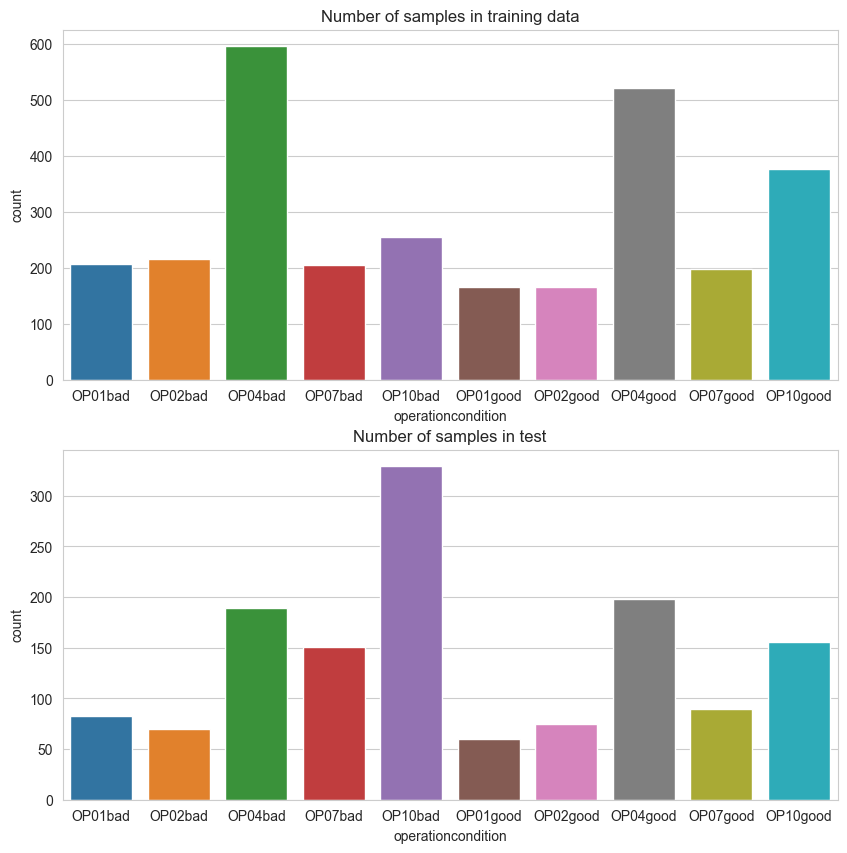

In [ ]:
#checking the number of sample in time domain data
# sns.set_style('whitegrid')
# plt.figure(figsize = (10, 5))
# sns.countplot(x = 'Toolcondition', data = time_feature_all)
# plt.title('Number of samples in timedomain dataset')
# plt.show()
# sns.set_style('whitegrid')
# #plt.figure(figsize = (15, 15))
# plt.figure(figsize = (10, 10))
# plt.subplot(2,1,1)
# sns.countplot(x = 'operationcondition', data = wavelet_feature_all)
# plt.title('Number of samples in training data')
# plt.subplot(2,1,2)
# sns.countplot(x = 'operationcondition', data = wavelet_feature_test)
# plt.title('Number of samples in test')
# plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

MODEL = RandomForestClassifier(bootstrap = True, max_depth= 25,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1)
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.9303944315545244

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.97      0.97      0.97        58
    OP01good       1.00      0.73      0.85        45
     OP02bad       1.00      0.96      0.98        57
    OP02good       0.88      0.79      0.84        48
     OP04bad       0.99      0.98      0.98       157
    OP04good       0.85      0.97      0.91       144
     OP07bad       1.00      0.93      0.96        71
    OP07good       0.90      0.91      0.91        58
     OP10bad       0.97      0.97      0.97       117
    OP10good       0.85      0.88      0.87       107

    accuracy                           0.93       862
   macro avg       0.94      0.91      0.92       862
weighted avg       0.93      0.93      0.93       862



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


# SUPPORT VECTOR CLASSIFIER (SVC)

In [ ]:
from sklearn.svm import SVC
MODEL = make_pipeline(StandardScaler(), SVC(kernel='rbf',C=9,gamma='auto'))
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8932714617169374


# Logistic regression model

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report


# # standardization
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_data_lr = scaler.transform(X_train)
# X_test_data_lr = scaler.transform(X_test)
# # logistic regression model
# lr = LogisticRegression(random_state = 21)
# lr.fit(X_train_data_lr, y_train)
# y_pred = lr.predict(X_test_data_lr)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\n -------------Classification Report-------------\n")
# print(classification_report(y_test, y_pred))

Accuracy: 0.5802997858672377

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.05      0.01      0.02        83
    OP01good       0.37      0.32      0.34        60
     OP02bad       1.00      0.87      0.93        70
    OP02good       0.82      0.19      0.30        75
     OP04bad       0.41      0.28      0.33       189
    OP04good       0.54      0.70      0.61       198
     OP07bad       0.77      0.55      0.64       151
    OP07good       0.69      0.94      0.79        90
     OP10bad       0.71      0.80      0.75       329
    OP10good       0.36      0.61      0.45       156

    accuracy                           0.58      1401
   macro avg       0.57      0.53      0.52      1401
weighted avg       0.58      0.58      0.56      1401



C:\Users\AHUSSAIN14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# CONFUSION MATRIX

In [ ]:
labels = wavelet_feature_all['operationcondition'].unique()

In [ ]:
from sklearn.metrics import confusion_matrix
test_confu_matrix = confusion_matrix(y_test,  y_pred)

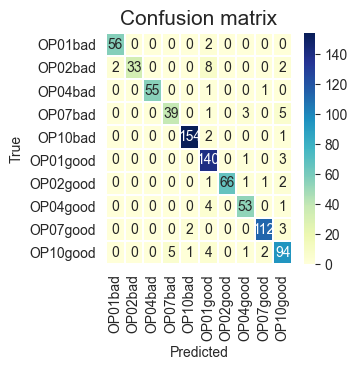

In [ ]:
# confusion matrix
plt.figure(2,figsize=(3,3))
# sns.heatmap(test_confu_matrix, annot = True,
# xticklabels=Labels, yticklabels=Labels, cmap = "Blues")
# plt.title('Test Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()
sns.heatmap(test_confu_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# PCA ANALYSIS

In [ ]:
from sklearn.decomposition import PCA
X = wavelet_feature_all.drop(wavelet_feature_all.columns[0:6], axis=1)
Y = wavelet_feature_all['operationcondition']

x = StandardScaler().fit_transform(X)
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
             #, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [ ]:
principalDf.shape


(4307, 20)

In [ ]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.474322,-0.611789,1.386618,0.936979,-1.018021,-0.477261,-0.315762,-0.158871,0.915114,0.205575,0.358712,0.308898,1.516229,-0.826524,0.487242,-0.093735,0.505393,0.277238,-1.109314,0.101077
1,-3.648181,-0.656040,1.920336,0.987424,-1.109915,-0.974817,0.472349,-0.017336,0.486433,1.338528,-0.129715,1.680134,0.702868,0.245524,0.958130,-0.241569,0.040406,-0.470434,-0.781507,-0.087261
2,-3.482935,-1.689158,1.650164,0.255013,-1.780435,-0.797308,-0.812361,1.045991,1.256079,-1.402998,-0.434086,-1.204009,-0.608758,-0.154148,0.576753,0.175711,0.069903,-0.475472,-0.173406,0.251224
3,-3.895320,-1.971930,1.249907,0.036079,-1.433991,0.228264,-1.658690,0.151881,0.981825,-0.806207,0.876594,-1.966596,-1.132334,-0.996998,0.109714,0.555853,0.728292,-0.210786,-0.197057,0.658781
4,-2.966059,-1.399562,1.358900,-0.332920,-1.546771,-1.164891,-1.278835,-0.456236,-0.431022,0.702003,1.172651,1.204308,0.644867,-0.545375,-0.073026,-0.186600,0.547961,0.184124,-0.047227,0.184081


In [ ]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf, Y,test_size = 0.2, stratify = Y,
                                                                    random_state = 123)
print (y_test.value_counts(), y_train.value_counts())

OP04bad     157
OP04good    144
OP10bad     117
OP10good    107
OP07bad      71
OP07good     58
OP01bad      58
OP02bad      57
OP02good     48
OP01good     45
Name: operationcondition, dtype: int64 OP04bad     628
OP04good    576
OP10bad     468
OP10good    426
OP07bad     285
OP01bad     232
OP07good    230
OP02bad     228
OP02good    192
OP01good    180
Name: operationcondition, dtype: int64


In [ ]:
MODEL = RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1)
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.740139211136891

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.91      0.83      0.86        58
    OP01good       0.61      0.24      0.35        45
     OP02bad       0.96      0.95      0.96        57
    OP02good       0.62      0.38      0.47        48
     OP04bad       0.80      0.86      0.83       157
    OP04good       0.62      0.84      0.71       144
     OP07bad       0.83      0.63      0.72        71
    OP07good       0.79      0.59      0.67        58
     OP10bad       0.82      0.87      0.85       117
    OP10good       0.58      0.65      0.61       107

    accuracy                           0.74       862
   macro avg       0.75      0.68      0.70       862
weighted avg       0.75      0.74      0.73       862



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


# Feature selection random forest

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1))
sel.fit(X_train, y_train)

# MODEL = RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1)
# MODEL.fit(X_train, y_train)
# y_pred = MODEL.predict(X_test)
# # Saving feature names for later use
# feature_list = list(X.columns)
# # Convert to numpy array
# features = np.array(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.4s finished


SelectFromModel(estimator=RandomForestClassifier(max_depth=30,
                                                 min_samples_split=5,
                                                 n_estimators=200,
                                                 random_state=42, verbose=1))

In [ ]:
sel.get_support()

array([False,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False,  True, False, False,  True])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

43

In [ ]:
print(selected_feat)

Index(['maxX0', 'minX0', 'stdX0', 'skewX0', 'kurtosisX0', 'EnergyX0', 'stdX1',
       'kurtosisX1', 'EnergyX1', 'maxX2', 'minX2', 'stdX2', 'kurtosisX2',
       'EnergyX2', 'maxY0', 'minY0', 'meanY0', 'stdY0', 'skewY0', 'kurtosisY0',
       'EnergyY0', 'maxY1', 'minY1', 'stdY1', 'kurtosisY1', 'EnergyY1',
       'maxZ0', 'minZ0', 'stdZ0', 'skewZ0', 'kurtosisZ0', 'maxZ1', 'minZ1',
       'stdZ1', 'skewZ1', 'kurtosisZ1', 'EnergyZ1', 'maxZ2', 'minZ2', 'stdZ2',
       'EnergyZ2', 'stdZ3', 'EnergyZ3'],
      dtype='object')


In [ ]:
#df2 = df[["Courses","Fee","Duration"]] # select multile columns
X_new = wavelet_feature_all[selected_feat]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y,test_size = 0.2, stratify = Y,
                                                                    random_state = 123)
print (y_test.value_counts(), y_train.value_counts())

OP04bad     157
OP04good    144
OP10bad     117
OP10good    107
OP07bad      71
OP07good     58
OP01bad      58
OP02bad      57
OP02good     48
OP01good     45
Name: operationcondition, dtype: int64 OP04bad     628
OP04good    576
OP10bad     468
OP10good    426
OP07bad     285
OP01bad     232
OP07good    230
OP02bad     228
OP02good    192
OP01good    180
Name: operationcondition, dtype: int64


In [ ]:
MODEL = RandomForestClassifier(bootstrap = True, max_depth= 25,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1)
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.9222737819025522

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.93      0.95      0.94        58
    OP01good       0.94      0.73      0.83        45
     OP02bad       0.98      0.98      0.98        57
    OP02good       0.93      0.88      0.90        48
     OP04bad       0.99      0.97      0.98       157
    OP04good       0.83      0.92      0.87       144
     OP07bad       0.98      0.89      0.93        71
    OP07good       0.89      0.93      0.91        58
     OP10bad       0.97      0.97      0.97       117
    OP10good       0.85      0.87      0.86       107

    accuracy                           0.92       862
   macro avg       0.93      0.91      0.92       862
weighted avg       0.93      0.92      0.92       862



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


# FFT 

In [ ]:
# from scipy.fftpack import fft, ifft
# sr = 2000
# t = df['Time (s)'].values
# x = df['X'].values

# X = fft(x)
# N = len(X)
# n = np.arange(N)
# T = N/sr
# freq = n/T 

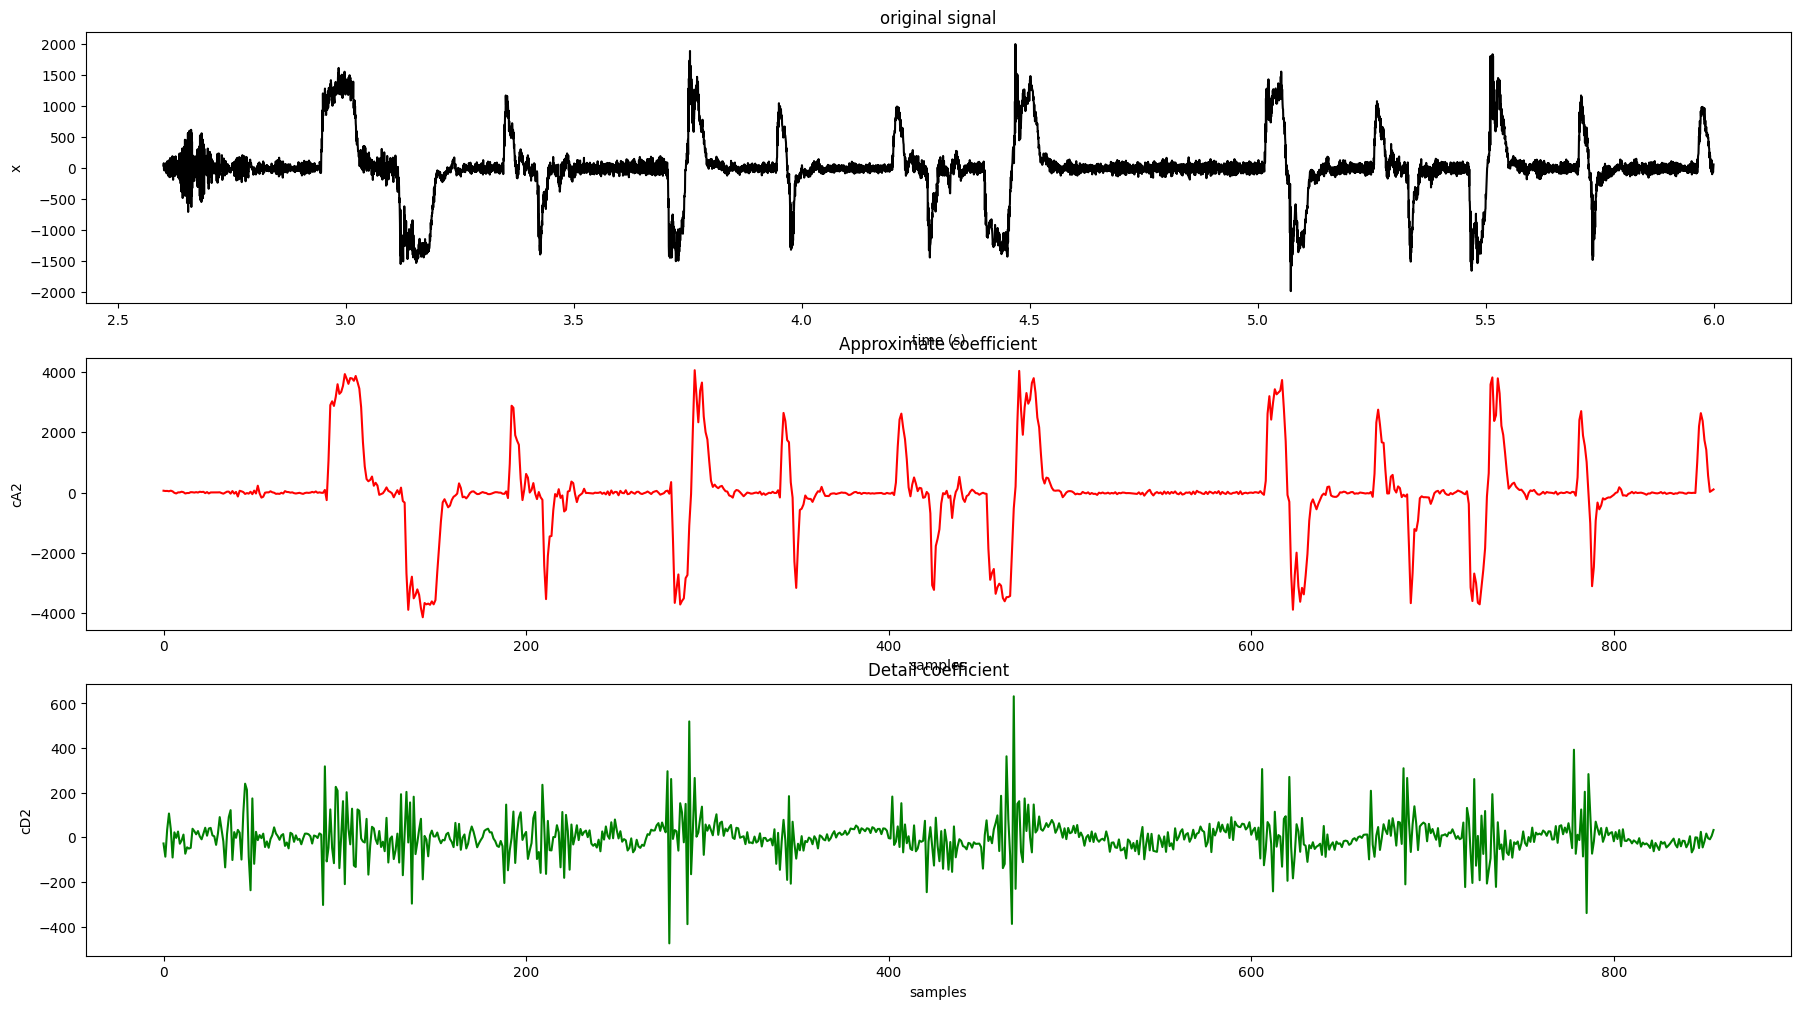

In [ ]:
#Ploting the signals
# plt.figure(figsize = (22, 12))
# plt.subplot(3,1,1)
# plt.plot(t, x, 'k',)
# plt.xlabel('time (s)')
# plt.ylabel('x')
# plt.title ('original signal')
# plt.xlim(0, 10)

# plt.subplot(3,1,2)
# plt.plot(coeffs[0], 'r')
# plt.xlabel('samples')
# plt.ylabel('cA2')
# plt.title ('Approximate coefficient')

# plt.subplot(3,1,3)
# plt.plot(coeffs[1], 'g')
# plt.xlabel('samples')
# plt.ylabel('cD2')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,4)
# plt.plot(coeff3, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,5)
# plt.plot(coeff4, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,6)
# plt.plot(coeff5, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,7)
# plt.plot(coeff6, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,8)
# plt.plot(coeff7, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(9,1,9)
# plt.plot(coeff8, 'g')
# plt.xlabel('samples')
# plt.ylabel('cD1')
# plt.title ('Detail coefficient')

# plt.subplot(3,1,3)
# plt.plot(t,y[0:6799], 'g')
# plt.xlabel('time')
# plt.ylabel('value')
# plt.title ('reconstructed signal')

# plt.show()